<h1 style="color:#4E2A84;">Setup Amazon Braket Environment</h1> 

Make sure that you have installed the latest Amazon Braket environment in qBraid Lab ([installation instructions](https://docs.qbraid.com/lab/user-guide/environments#install-environment)) and have selected the `Python [Braket vX.X]` kernel. (You can switch kernels by going to the Menu Bar → Kernel → Change Kernel). 

You can vew the kernel currently selected in the top-right of the editor window: <img src="images/image_select_kernel.png" alt="Kernel selection" style="width:200px;"/>

<h1 style="color:#4E2A84;">General Setup for Coding</h1> 

Before writing any code, you need to import the appropriate libraries. This notebook uses Amazon Braket enviroment, which is initialized with the below imports.

In [1]:
# general imports
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline
import string

# AWS imports: import Braket SDK modules
from braket.circuits import Circuit, Gate, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

<h1 style="color:#4E2A84;">Code for Bell State Circuit</h1>

Now you can write a simple Bell State circuit which consists of an $H$ gate followed by $CNOT$ gate. Below code creates a new quantum circuit object named bell using the $Circuit()$ constructor. Subsequent lines of code add the $H$ gate (on qubit $0$) and $CNOT$ gate (between qubits $0$ and $1$, the first qubit is the control qubit, the second qubit is the target qubit). Finally, $print()$ command is called to print/draw the circuit for easy visual observation.


In [3]:
# define circuit
bell = Circuit()

In [4]:
# add gates to the circuit to define its operation
bell.h(0)
bell.cnot(0, 1)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1)])

In [6]:
# print circuit
print(bell)

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


<h1 style="color:#4E2A84;">Execute the Circuit in a Simulator</h1> 

Now you can execute the circuit using an exact state-vector simulator running on a classical CPU. This local simulator is the preferred choice for fast experiments with low to intermediate qubit numbers ($N<20-25$) and essentially unlimited circuit depth.

A $device$ is the quantum computer backend where you want to execute your circuit. A device can also be a simulator. In this case the state-vector simulator is called $LocalSimulator()$ and is provided as part of the Amazon Braket environment.

$device.run()$ is used to execute a circut. You can specify the number of $shots$, or how many times the same circuit will be run. Each shot generates a measurement resuts, and all the results form all the shots are combined together to generate the output probabilities. Currently you need on the order of about $1000$ shots to get enough data.

In [7]:
# set up device: Local Simulator
device = LocalSimulator()

In [14]:
# run circuit (execute single TASK)
bell_circuit_shots = 1000
result = device.run(bell, shots=bell_circuit_shots).result()

In [15]:
# get measurement counts
counts = result.measurement_counts

In [16]:
# print counts
print(counts)

Counter({'00': 509, '11': 491})


Text(0, 0.5, 'counts')

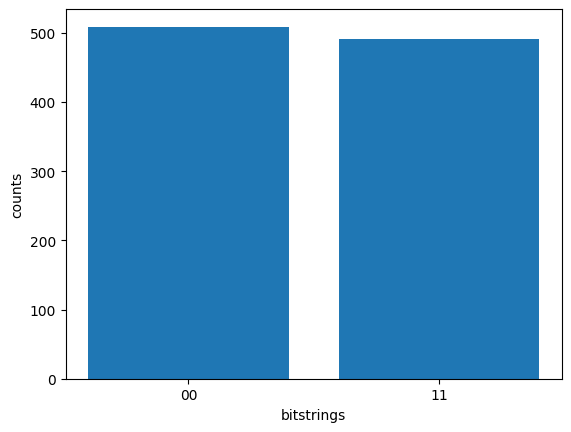

In [17]:
# plot the counts
plt.bar(counts.keys(), counts.values())
plt.xlabel("bitstrings")
plt.ylabel("counts")

<h1 style="color:#4E2A84;">Interpert the Results</h1>

You should see a bar graph showing the outputs generated by the circuit. Since the Bell circuit uses 2 qubits, there are 4 possible outputs: $00$, $01$, $10$, and $11$. However, by definition a bell state should generate an entangled state and only $00$ or $11$ outputs should be possible (the qubits are entangled and they always produce the same output, either both $0$ or both $1$. As the result, the bar graph should have only two bars, one for $11$ state and one for $00$ state. Each of the two possible outputs should be generated with equal probability so you should get about $50\%$ of $11$ and $50\%$ of $00$. Due to simulated noise and uncertaintity, the actual outputs may vary slightly. Youw should also see the output counts on the y-axis. Since the circuit was exected $1000$ times the output counts should be about $500$ for $11$ state and the other $500$ for $00$ state.

An example output should look like:
<img src="images/image_bell_example_simulation_output.png" alt="Example output from Bell circuit simulation" style="width:200px;"/>

<h1 style="color:#4E2A84;">Get Ready to Execute Circuit on Real Quantum Computer</h1>

Now you are ready to execute the circuit on a real quantum computer. We will use Amazon Web Servies (AWS) to submit the circuit to be executed on the Rigetti Ankaa-3 quantum computer.

<h1 style="color:#4E2A84;">Estimate qBraids Credits Needed</h1> 

The cost to run a circuit on a quantum computer is divided into per-task cost (effectively the cost to submit a circuit for execution) and per-shot cost (additional cost for each shot).

You can view the cost by selecting $DEVICES$ on the right-hand side of the editor, then search for Rigetti Ankaa-3 (AWS) and finally selecting the pricing cell. <img src="images/image_pricing.png" alt="View pricing" style="width:300px;"/>

The current cost is $30$ qBraid Credits per-task on Ankaa-3 and then $0.09$ qBraid Credits per-task.

Currently each qBraid credit is valued at $0.01$ USD. This means that $100$ credits equate to $1.00$ USD.

In [18]:
# compute cost
perTaksCost = 30.00
perShotCost = 0.09
totalCost = perTaksCost+perShotCost*bell_circuit_shots
totalCostDollars = totalCost/100

In [19]:
# print cost
print(f'Cost to run Bell circuit on Rigetti Ankaa-3 via AWS is:')
print(f'{totalCost} qBraid Credit or equivalently ${totalCostDollars} USD')

Cost to run Bell circuit on Rigetti Ankaa-3 via AWS is:
120.0 qBraid Credit or equivalently $1.2 USD


<h1 style="color:#4E2A84;">Request qBraid Credits</h1> 

If you do not have AWS credentials for submitting your quantum jobs, you will need qBraid Credits to run the code on actual quantum computer. Please request qBraid Credits from the instructor. After you have qBraid Credits then you can proceed with the following code.

<h1 style="color:#4E2A84;">Subimt Circuit for Execution on Quantum Computer</h1> 

Now you can submit the circuit for execution. You will submit the circuit to execute on the target quantum computer. The circuit will be queued by AWS, you will need to periodically check the status of the circuit to see when it has executed and then results will be available.

You can check the status of the quantum jobs on the right-hand side of the notebook under $JOBS$ tab. The job will be:

1. INITIALIED when the job is submitted
<img src="images/image_quantum_jobs_initialized.png" alt="Kernel selection" style="width:300px;"/>

2. QUEUED when the job is waiting to be executed
<img src="images/image_quantum_jobs_queued.png" alt="Kernel selection" style="width:300px;"/>

3. COMPLETED when the job is completed
<img src="images/image_quantum_jobs_completed.png" alt="Kernel selection" style="width:300px;"/>

The code below will submit job for execution, it should be in the $QUEUED$ state when you print the status of the task (unless in a very very unlikely scenario the queue was empty and the job already executed).

In [20]:
# set up device
ankaa = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3")

# run circuit
ankaa_task = ankaa.run(bell, shots=bell_circuit_shots)

# get id and status of submitted task
ankaa_task_id = ankaa_task.id
ankaa_status = ankaa_task.state()

# print task status
print(f'Status of task: {ankaa_status}\n')

# print task id for future reference
print(f'Task id: {ankaa_task_id}')

Status of task: QUEUED

Task id: arn:aws:braket:us-west-1:592242689881:quantum-task/b6eb8a2c-d03c-49ba-b08d-34385df18bb0


<h1 style="color:#4E2A84;">Wait for Circuit to Execute</h1> 

The task is submitted and you can regularly (or irregularly) check the status of this task by executing the following code.

For this example code, the task ID is stored in the $ankaa\_task\_id$ variable. If the notebook is interrupted, the variable may be lost and you have to manually re-enter the task id in the below code.

If job id is lost, you can use the $taskArn$ for your job (from the $JOBS$ tab on the right-hand side) to find the task ID.

In [22]:
from braket.aws import AwsQuantumTask

# get task arn
ankaa_task_arn = 'arn:aws:braket:us-west-1:592242689881:quantum-task/b6eb8a2c-d03c-49ba-b08d-34385df18bb0'

# load the quantum task
ankaa_task_id = AwsQuantumTask(arn=ankaa_task_arn)

# print status
status = ankaa_task_id.state()
print("Status of the task:", status)

Status of the task: COMPLETED


<h1 style="color:#4E2A84;">Get Results of the Computation</h1> 

Once the circuit has executed, you can use the unique task ID to retrieve the results.

1000 shots taken on machine arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3.

Measurement counts: Counter({'00': 488, '11': 429, '01': 48, '10': 35})


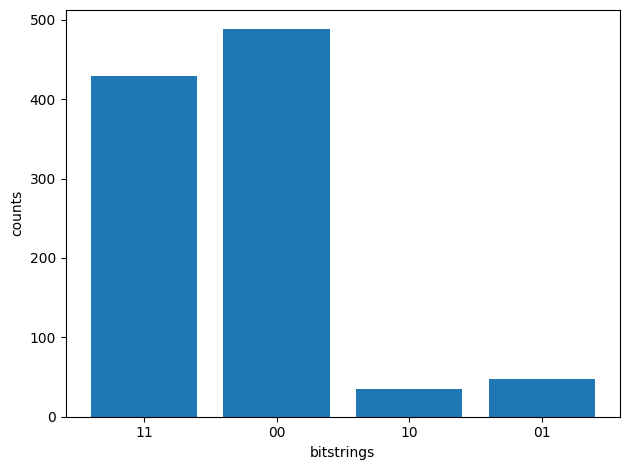

In [23]:
import matplotlib.pyplot as plt

# get results
ankaa_results = ankaa_task_id.result()

# get all metadata of submitted task
metadata = ankaa_task_id.metadata()

# print some metadata
shots = metadata["shots"]
machine = metadata["deviceArn"]
print("{} shots taken on machine {}.\n".format(shots, machine))

# get measurement counts
ankaa_counts = ankaa_results.measurement_counts
print("Measurement counts:", ankaa_counts)

# plot results: see effects of noise
plt.bar(ankaa_counts.keys(), ankaa_counts.values())
plt.xlabel("bitstrings")
plt.ylabel("counts")
plt.tight_layout()

<h1 style="color:#4E2A84;">Interpret Results</h1>

You should see a bar graph showing the outputs generated by the circuit. Since the Bell circuit uses 2 qubits, there are 4 possible outputs: $00$, $01$, $10$, and $11$. By definition a Bell state should generate an entangled state and only $00$ or $11$ outputs should be possible (the qubits are entangled and they always produce the same output, either both $0$ or both $1$). However, on a real noisy quantum computer, there are gate and other errors that may prevent the engangelment or measurement may be incorrect, so you will see some other states as well.

Example output from executing Bell state circuit on the Ankaa-3 quantum computer:
<img src="images/image_bell_example_real_execution_output.png" alt="Kernel selection" style="width:300px;"/>

<h1 style="color:#4E2A84;">That's All Folks!</h1>

Congratualtions, you have now simulated Bell State circuit, estimated its cost to run on real quantu computer, submitted the circuit for execution, waited for results and graphed the final data from the real device.